In [3]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
iris=datasets.load_iris()
type(iris)
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [7]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [8]:
# 150 rows  and 4 columns (features)
iris.data.shape

(150, 4)

In [9]:
iris.target.shape

(150,)

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
x=iris.data
y=iris.target
df=pd.DataFrame(x,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

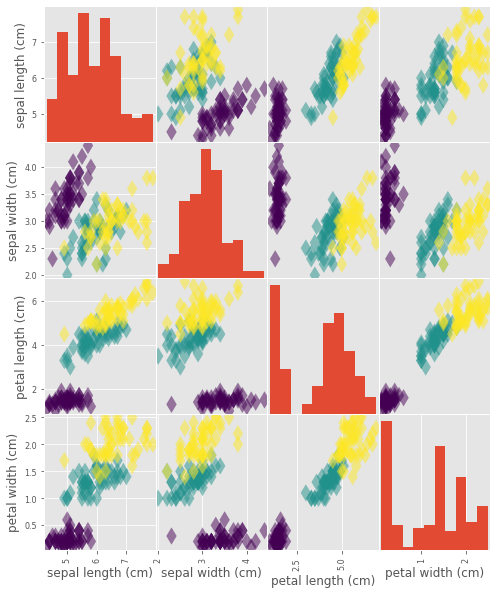

In [15]:
_=pd.plotting.scatter_matrix(df,c=y,figsize=[8,10],s=150,marker="d")

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=6)
knn.fit(iris["data"],iris["target"])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

prediction on unlabeled data

In [19]:
x_new=np.array([[5.4,3.4,6.2,2.1],
                [1.3,4.2,2.1,3.2]])
prediction=knn.predict(x_new)
x_new.shape

(2, 4)

In [20]:
print("prediction:{}".format(prediction))

prediction:[2 0]


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21,stratify=y)

knn= KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
print("prediction:{}".format(prediction))

prediction:[1 0 0 1 2 2 0 1 0 2 2 2 0 1 0 0 1 1 0 2 1 0 2 2 2 1 2 1 1 0]


In [26]:
knn.score(x_test,y_test)

0.9333333333333333